In [1]:
# import load_iris funtion from datasets module
from sklearn.datasets import load_iris

# save "bunch" object containing iris datasets and attribute
iris = load_iris()

# store fature matrix in x
x = iris.data

# store response vector in y
y = iris.target

In [4]:
# Step 1: split x and y into training test and testing test
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state=4)

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


In [7]:
# Step 2: train the model on the training set
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
# step 3: make prediction on the testing set
y_pred = logreg.predict(x_test)

# compare actual response values (y_test) with predicted response valus (y_pred)
# Classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.95


In [11]:
# Repeat above steps for KNN, k=1
from sklearn.neighbors import KNeighborsClassifier
km = KNeighborsClassifier(n_neighbors=1)
km.fit(x_train,y_train)
y_pred = km.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.95


In [12]:
# Repeat above steps for KNN, k=5
from sklearn.neighbors import KNeighborsClassifier
km = KNeighborsClassifier(n_neighbors=5)
km.fit(x_train,y_train)
y_pred = km.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.966666666667


In [18]:
# Locate better valu for k
k_range = range(1,30)
scores = []
for k in k_range:
    knn =  KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

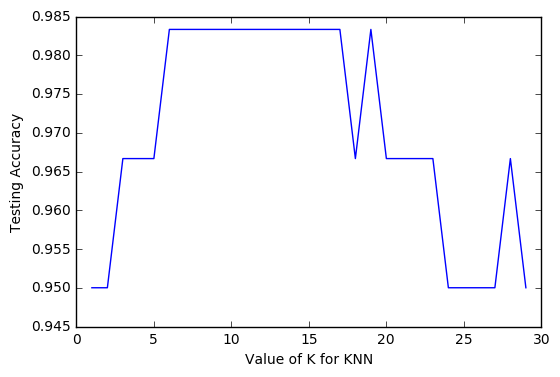

In [19]:
# import matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between k and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')